In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.utils import shuffle
from skimage.transform import resize 
import glob 
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from tqdm import tqdm

In [2]:
test_damage=glob.glob('test/damage/*.jpeg')
test_no_damage=glob.glob('test/no_damage/*.jpeg')
test_another_damage=glob.glob('test_another/damage/*.jpeg')
test_another_no_damage=glob.glob('test_another/no_damage/*.jpeg')

In [3]:
print(len(test_damage))
print(len(test_no_damage))
print(len(test_another_damage))
print(len(test_another_no_damage))

1000
1000
8000
1000


In [4]:
image_test= []
label_test= []

for i in tqdm(test_damage):
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(0)

    
for i in tqdm(test_no_damage):
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(1)

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1291.75it/s]


In [5]:
image_train= []
label_train= []

for i in tqdm(test_another_damage):
    img = plt.imread(i)
    image_train.append(img)
    label_train.append(0)

    
for i in tqdm(test_another_no_damage):
    img = plt.imread(i)
    image_train.append(img)
    label_train.append(1)

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 561.16it/s]


In [6]:
image_test, label_test = shuffle(image_test,label_test, random_state = 100)

In [7]:
image_train, label_train = shuffle(image_train,label_train, random_state = 100)

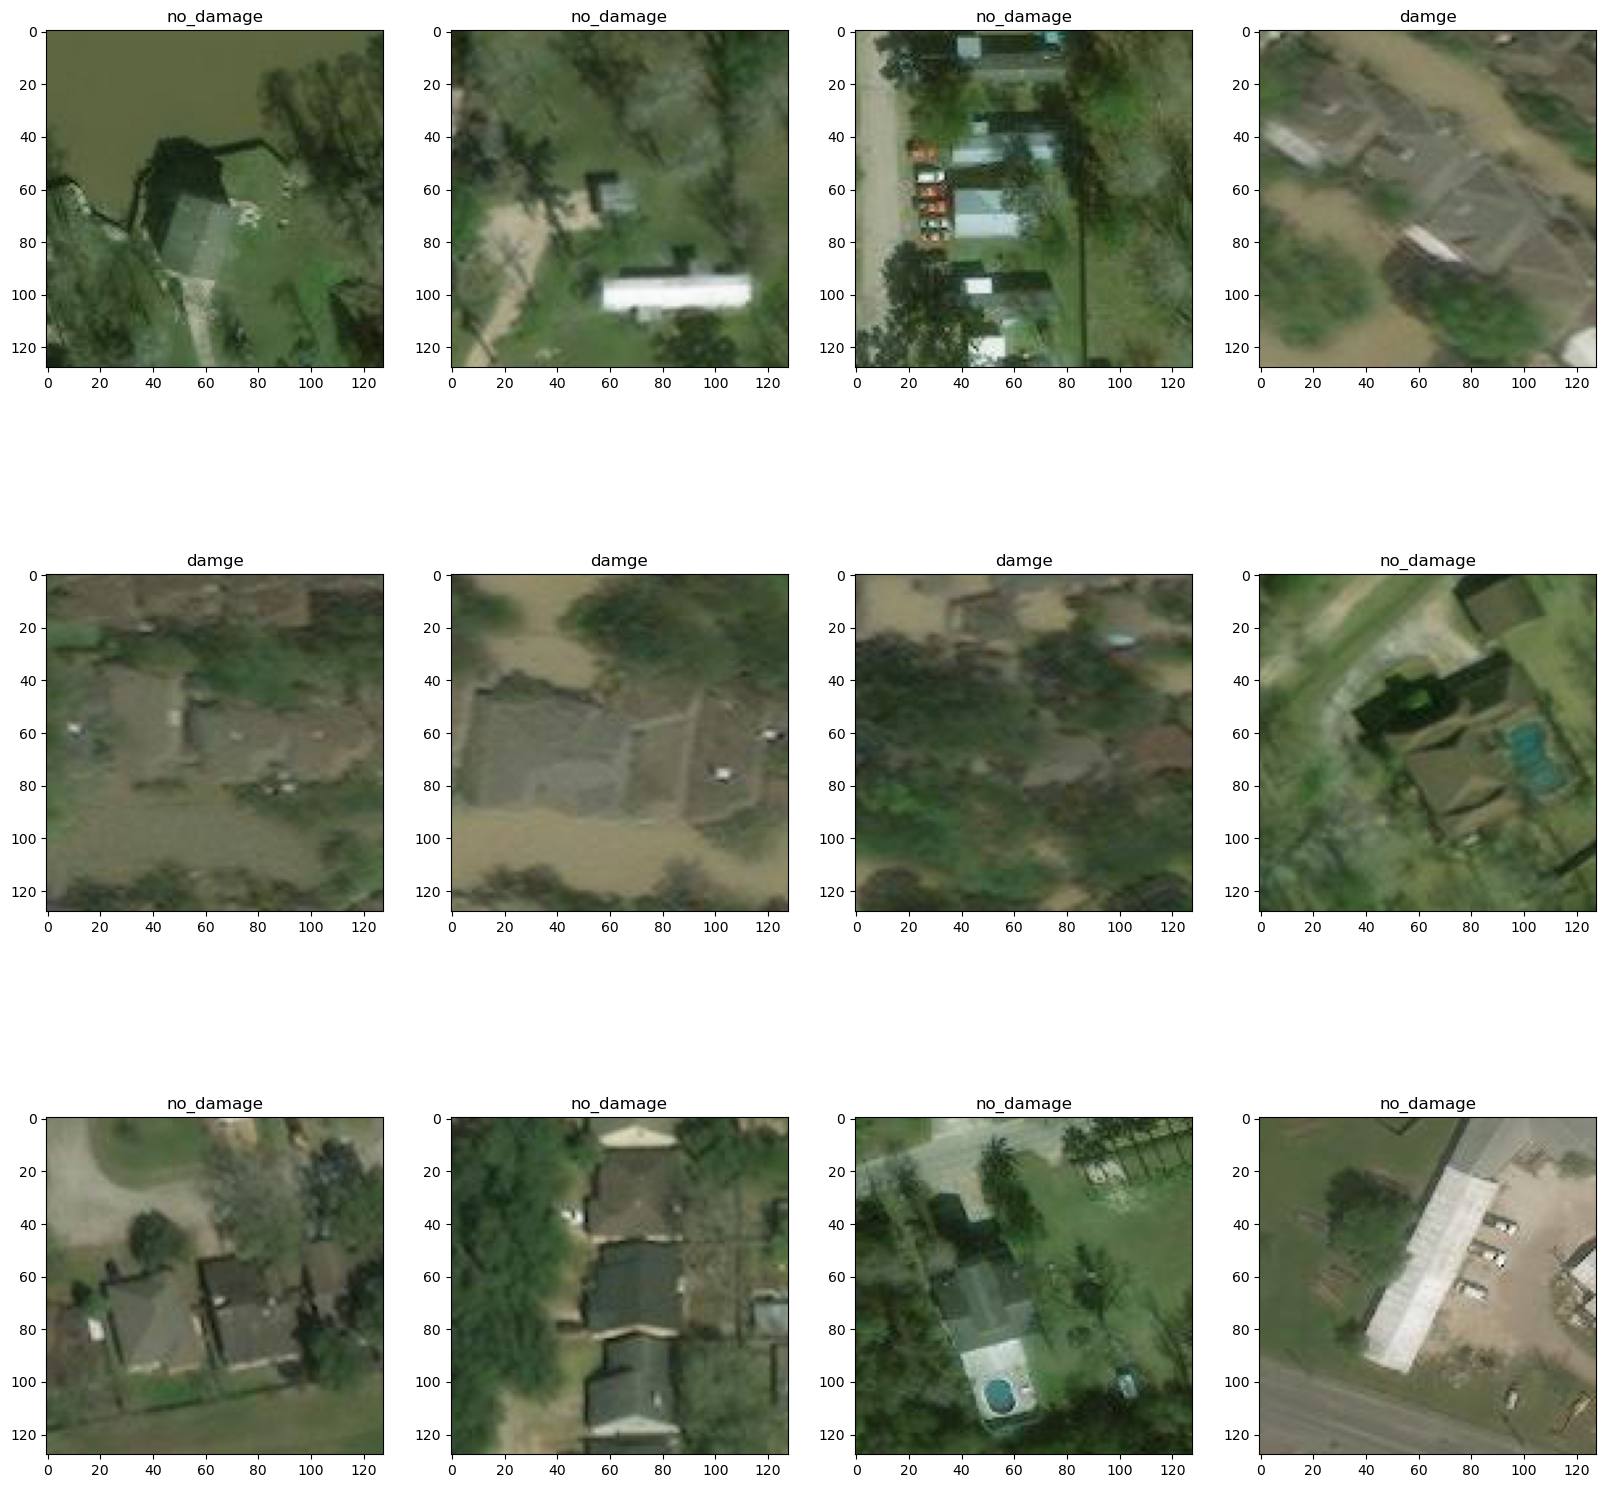

In [8]:
plt.figure(figsize = (20,20))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image_test[i])
    if label_test[i] == 1:
        plt.title('no_damage')
    else:
        plt.title('damge')

In [9]:
x_train=[]
for i in image_test:
    x_train.append(resize(i,(64,64,3)))


In [10]:
x_train=np.array(x_train)

In [11]:
x_test=[]
for i in image_train:
    x_test.append(resize(i,(64,64,3)))

In [12]:
x_test=np.array(x_test)

In [13]:
y_train=np.array(label_test)
y_test=np.array(label_train)

In [14]:
print('x_train shape:',(x_train.shape))
print('x_test shape:',(x_test.shape))
print('y_test shape:',y_test.shape)
print('y_train shape:',y_train.shape)

x_train shape: (2000, 64, 64, 3)
x_test shape: (9000, 64, 64, 3)
y_test shape: (9000,)
y_train shape: (2000,)


In [15]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (64, 64, 3)),
    keras.layers.MaxPool2D(2,2),
    
    keras.layers.Conv2D(32,(3,3), activation = 'relu'),
    keras.layers.MaxPool2D(2,2),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

In [16]:
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 64)                4

In [18]:
model.fit(x_train,y_train,epochs=10,validation_split=0.05)

Epoch 1/10
60/60 [==============================] - 12s 132ms/step - loss: 0.6846 - accuracy: 0.5389 - val_loss: 0.7185 - val_accuracy: 0.4900
Epoch 2/10
60/60 [==============================] - 7s 120ms/step - loss: 0.5779 - accuracy: 0.7084 - val_loss: 0.5716 - val_accuracy: 0.7100
Epoch 3/10
60/60 [==============================] - 7s 123ms/step - loss: 0.5100 - accuracy: 0.7695 - val_loss: 0.5350 - val_accuracy: 0.7800
Epoch 4/10
60/60 [==============================] - 7s 115ms/step - loss: 0.4460 - accuracy: 0.8216 - val_loss: 0.5999 - val_accuracy: 0.7000
Epoch 5/10
60/60 [==============================] - 7s 117ms/step - loss: 0.4295 - accuracy: 0.8274 - val_loss: 0.5153 - val_accuracy: 0.7300
Epoch 6/10
60/60 [==============================] - 7s 118ms/step - loss: 0.3818 - accuracy: 0.8416 - val_loss: 0.5029 - val_accuracy: 0.7700
Epoch 7/10
60/60 [==============================] - 7s 114ms/step - loss: 0.3755 - accuracy: 0.8442 - val_loss: 0.4851 - val_accuracy: 0.7700
Epoch

In [19]:
y_pred=model.predict(x_test)

282/282 [==============================] - 11s 38ms/step


In [20]:
y_pred=[np.argmax(i) for i in y_pred]

<AxesSubplot:>

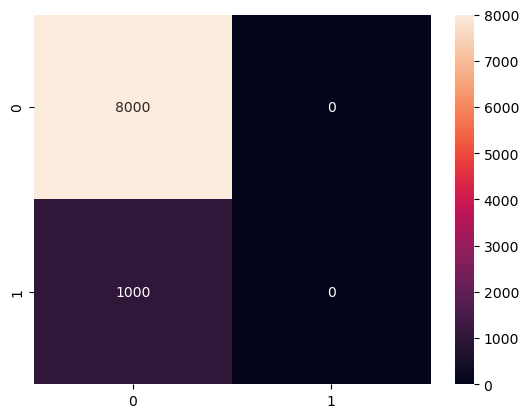

In [21]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')

In [22]:
accuracy_score(y_test,y_pred)

0.8888888888888888